In [1]:
#import libries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [2]:
# load data
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.shape

(7668, 15)

In [4]:
# Explore for missing values
df.isnull().sum()/len(df)*100

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

In [5]:
# Fill the na values in budget column with mode
df['budget'] = df['budget'].fillna(df['budget'].mode()[0])

In [6]:
# Check for the na again
df.isnull().sum()/len(df)*100

name        0.000000
rating      1.004173
genre       0.000000
year        0.000000
released    0.026082
score       0.039124
votes       0.039124
director    0.000000
writer      0.039124
star        0.013041
country     0.039124
budget      0.000000
gross       2.464789
company     0.221701
runtime     0.052165
dtype: float64

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.shape

(7412, 15)

In [9]:
# change the data type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [10]:
# Create separate column for released country
df['released_country'] = df['released'].apply(lambda st: st[st.find("(")+1:st.find(")")])

In [11]:
# Create separate column for released date
df['released_date']=df['released'].str.replace(r"\(.*\)","")
df['released_date']=pd.to_datetime(df['released_date'],infer_datetime_format=True)

In [12]:
# remove 'released' column
df.drop('released', axis=1, inplace=True)

In [13]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_country,released_date
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980-06-20
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980-07-02
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980-07-25


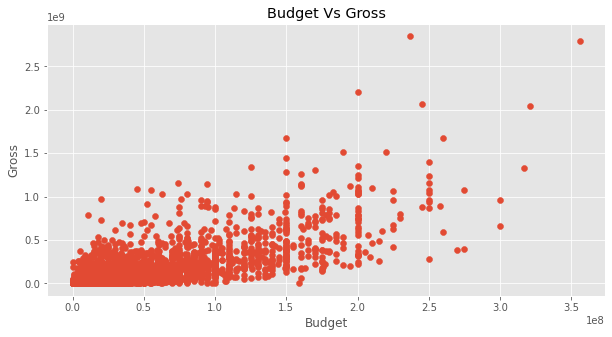

In [14]:
# scatter plot for budget vs gross
plt.figure(figsize = (10,5))
plt.scatter(x=df['budget'], y=df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget Vs Gross');

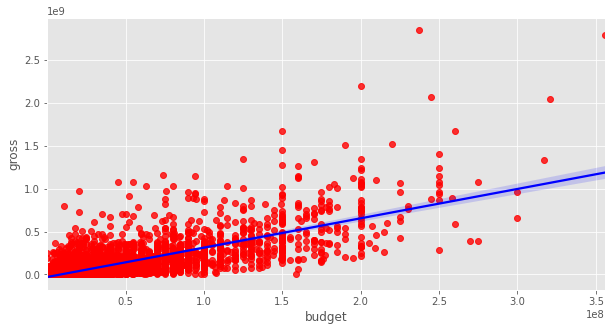

In [15]:
#
plt.figure(figsize = (10,5))
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"});

In [17]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.093951,0.218941,0.292577,0.258826,0.114237
score,0.093951,1.000000,0.415190,0.058862,0.188071,0.397226
votes,0.218941,0.415190,1.000000,0.458713,0.631110,0.309945
budget,0.292577,0.058862,0.458713,1.000000,0.746657,0.273793
gross,0.258826,0.188071,0.631110,0.746657,1.000000,0.245117
runtime,0.114237,0.397226,0.309945,0.273793,0.245117,1.000000


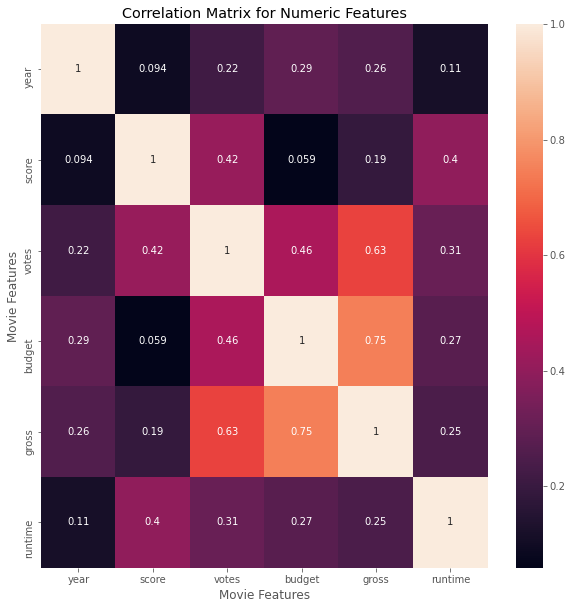

In [25]:
corr_mat = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True)
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [36]:
# convert ojbect variable in categorical

df_num = df.copy()

for col in df_num.columns:
    if df_num[col].dtype == 'O':
        df_num[col] = df_num[col].astype('category')
        df_num[col] = df_num[col].cat.codes
        
df_num.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_country,released_date
0,6372,6,6,1980,8.4,927000.0,2471,3851,979,52,19000000,46998772,2179,146.0,54,1980-06-13
1,5373,6,1,1980,5.8,65000.0,2169,1564,306,53,4500000,58853106,686,104.0,54,1980-07-02
2,4956,4,0,1980,8.7,1200000.0,1063,2464,1642,53,18000000,538375067,1446,124.0,54,1980-06-20
3,277,4,4,1980,7.7,221000.0,1248,1920,2112,53,3500000,83453539,1697,88.0,54,1980-07-02
4,993,6,4,1980,7.3,108000.0,1010,499,387,53,6000000,39846344,1665,98.0,54,1980-07-25


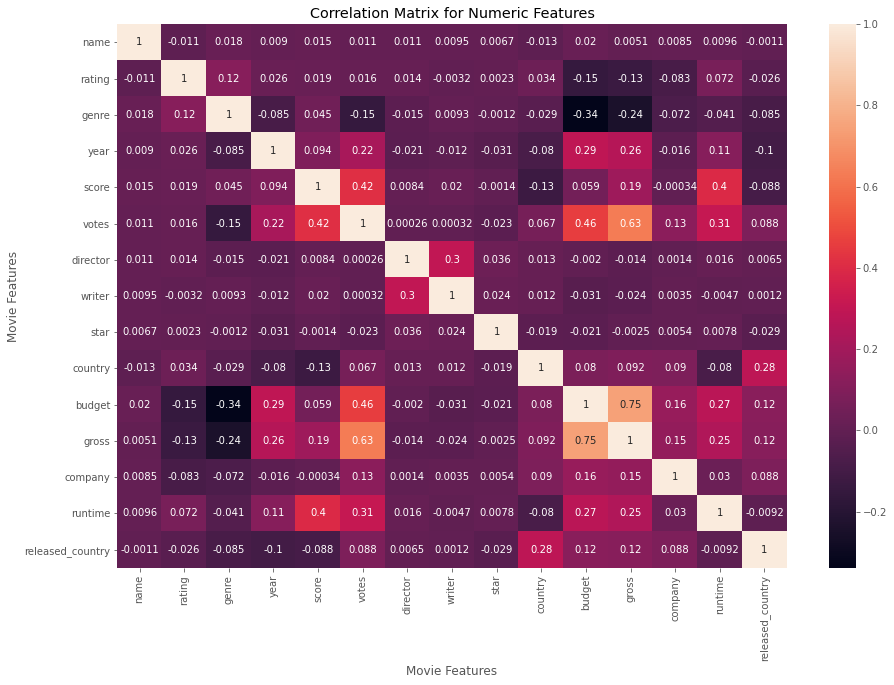

In [41]:
corr_mat = df_num.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, annot=True)
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [42]:
correlation_mat = df_num.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name              name                1.000000
                  rating             -0.010815
                  genre               0.018363
                  year                0.008987
                  score               0.014970
                                        ...   
released_country  budget              0.122345
                  gross               0.117241
                  company             0.088342
                  runtime            -0.009159
                  released_country    1.000000
Length: 225, dtype: float64

In [47]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget            genre              -0.338299
genre             budget             -0.338299
gross             genre              -0.242597
genre             gross              -0.242597
rating            budget             -0.148236
budget            rating             -0.148236
votes             genre              -0.148120
genre             votes              -0.148120
rating            gross              -0.131786
gross             rating             -0.131786
country           score              -0.126497
score             country            -0.126497
year              released_country   -0.100828
released_country  year               -0.100828
                  score              -0.088449
score             released_country   -0.088449
genre             year               -0.084892
year              genre              -0.084892
released_country  genre              -0.084674
genre             released_country   -0.084674
rating            company            -0.083083
company      

In [46]:
pd.set_option('display.max_rows', None)

In [48]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross             votes               0.631110
votes             gross               0.631110
budget            gross               0.746657
gross             budget              0.746657
name              name                1.000000
writer            writer              1.000000
company           company             1.000000
gross             gross               1.000000
budget            budget              1.000000
country           country             1.000000
star              star                1.000000
director          director            1.000000
votes             votes               1.000000
score             score               1.000000
year              year                1.000000
genre             genre               1.000000
rating            rating              1.000000
runtime           runtime             1.000000
released_country  released_country    1.000000
dtype: float64